In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
import pandas as pd
import prettyplotlib as ppl
from reddening_laws import *
from matplotlib import pyplot as plt
from matplotlib import rc
import brewer2mpl
from cycler import cycler
set2 = brewer2mpl.get_map('Dark2', 'Qualitative', 8).mpl_colors
rc('font', **{'family': 'serif', 'serif': ['Computer Modern Roman'], 'size':14})
rc('text', usetex=True)
rc('axes', prop_cycle=(cycler('color', set2)))

In [11]:
ret_df = pd.read_csv('final_data_files/reticulum_fit_params.csv')
omc_df = pd.read_csv('final_data_files/omegacen_fit_params.csv')
m4_ab_slopes = [-2.030, -2.215, -2.372, -2.370,-2.355]
m4_c_slopes = [-2.02, -2.34, -2.44, -2.658,-2.979]
m4_ab_err = [0.204, 0.176, 0.142, 0.139, 0.168]
m4_c_err = [0.273, 0.179, 0.198, 0.428, 0.337]
theo_ab_slopes = [-1.981,-2.239,-2.274]
theo_c_slopes = [-2.461,-2.696,-2.716]
theo_ab_err = [0.04,0.02,0.02]
theo_c_err = [0.08,0.04,0.04]

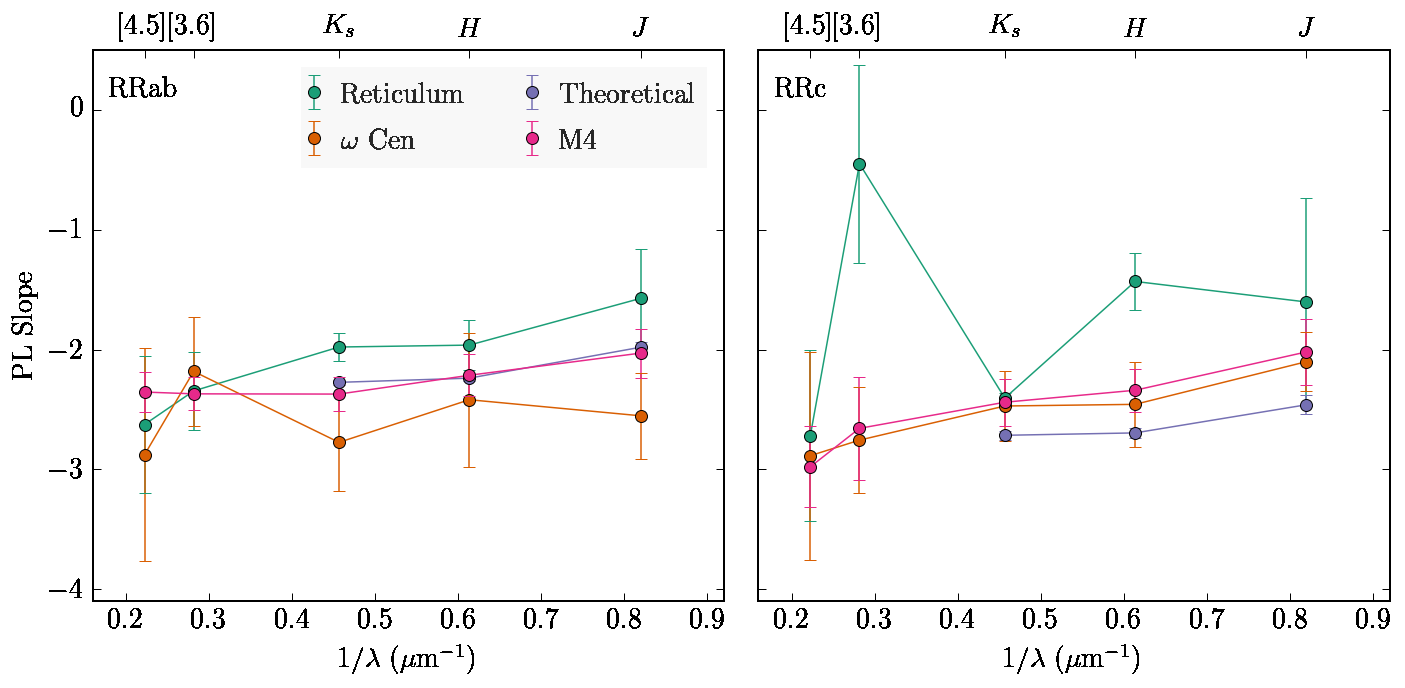

In [14]:
fig,(ax,ax2) = plt.subplots(1,2,figsize=(10,5),sharex=True,sharey=True)
#print set2
ppl.errorbar(ax,1/ret_df.wavelength.values[3:],ret_df.slope_ab.values[3:],ret_df.slope_err_ab[3:].values,
             fmt='o-',label='Reticulum')
#ppl.errorbar(ret_df.wavelength.values,ret_df.slope_c.values,ret_df.slope_err_c.values,fmt='o')
ppl.errorbar(ax,1/omc_df.wavelength.values,omc_df.slope_ab.values,omc_df.slope_err_ab.values,
             fmt='o-',label='$\omega$ Cen')
#ppl.errorbar(omc_df.wavelength.values,omc_df.slope_c.values,omc_df.slope_err_c.values,fmt='o')
ppl.errorbar(ax,1/ret_df.wavelength.values[3:6],theo_ab_slopes,theo_ab_err,
             fmt='o-',label='Theoretical')
ppl.errorbar(ax,1/ret_df.wavelength.values[3:],m4_ab_slopes,m4_ab_err,
             fmt='o-',label='M4')
ppl.errorbar(ax2,1/ret_df.wavelength.values[3:],ret_df.slope_c.values[3:],ret_df.slope_err_c[3:].values,
             fmt='o-')
ppl.errorbar(ax2,1/omc_df.wavelength.values,omc_df.slope_c.values,omc_df.slope_err_c.values,
             fmt='o-')
ppl.errorbar(ax2,1/ret_df.wavelength.values[3:6],theo_c_slopes,theo_c_err,
             fmt='o-')
ppl.errorbar(ax2,1/ret_df.wavelength.values[3:],m4_c_slopes,m4_c_err,
             fmt='o-')
ax.set_xlim(0.16,0.92)
ax.set_ylim(-4.1,0.5)
ax.set_xlabel('$1/\lambda$ ($\mu$m$^{-1}$)')
ax2.set_xlabel('$1/\lambda$ ($\mu$m$^{-1}$)')
ax.set_ylabel('PL Slope')
ax3 = ax.twiny()
ax3.set_xlim(ax.get_xlim())
ax3.set_xticks(1/omc_df.wavelength.values)
ax3.set_xticklabels(['$J$', '$H$',  '$K_s$', '[3.6]', '[4.5]'])
ax4 = ax2.twiny()
ax4.set_xlim(ax.get_xlim())
ax4.set_xticks(1/omc_df.wavelength.values)
ax4.set_xticklabels(['$J$', '$H$',  '$K_s$', '[3.6]', '[4.5]'])
ppl.legend(ax,numpoints=1,ncol=2,handlelength=0)
ax.text(0.18,0.1,'RRab')
ax2.text(0.18,0.1,'RRc')
fig.tight_layout()
fig.savefig('final_plots/slope_comparison.pdf')